In [1]:
import os
# os.environ["CUDA_VISIBLE_DEVICES"] = "1"

# Load datasets

In [3]:
import numpy as np
import pandas as pd
# from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout


import matplotlib.pyplot as plt
import os

In [4]:
x_train = np.load('/content/drive/MyDrive/Colab Notebooks/UNSW-NB15 - CSV Files/12-features/SGM/data.npy')
y_train = np.load('/content/drive/MyDrive/Colab Notebooks/UNSW-NB15 - CSV Files/12-features/SGM/label_10.npy')

x_test = np.load('/content/drive/MyDrive/Colab Notebooks/UNSW-NB15 - CSV Files/12-features/test/data.npy')
y_test = np.load('/content/drive/MyDrive/Colab Notebooks/UNSW-NB15 - CSV Files/12-features/test/label_10.npy')

x_val = np.load('/content/drive/MyDrive/Colab Notebooks/UNSW-NB15 - CSV Files/12-features/val/data.npy')
y_val = np.load('/content/drive/MyDrive/Colab Notebooks/UNSW-NB15 - CSV Files/12-features/val/label_10.npy')

print(x_train.shape,y_train.shape,x_test.shape,y_test.shape,x_val.shape,y_val.shape)

(1778030, 12) (1778030, 1) (508012, 12) (508012,) (254005, 12) (254005,)


In [5]:
from keras.utils import to_categorical
def encode(data):
    print('Shape of data (BEFORE encode): %s' % str(data.shape))
    encoded = to_categorical(data)
    print('Shape of data (AFTER  encode): %s\n' % str(encoded.shape))
    return encoded

y_train_onehot = encode(y_train)
y_test_onehot = encode(y_test)
y_val_onehot = encode(y_val)

Shape of data (BEFORE encode): (1778030, 1)
Shape of data (AFTER  encode): (1778030, 10)

Shape of data (BEFORE encode): (508012,)
Shape of data (AFTER  encode): (508012, 10)

Shape of data (BEFORE encode): (254005,)
Shape of data (AFTER  encode): (254005, 10)



In [6]:
from keras import regularizers

model = Sequential()
model.add(Dense(input_dim = 12,
                units = 128,
                activation = 'relu'))


model.add(Dense(units = 128,activation = 'relu'))

model.add(Dense(units = 64, activation = 'relu'))

model.add(Dense(units = 32, activation = 'relu'))

model.add(Dense(units = 10,activation = 'softmax'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1664      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 10)                330       
                                                                 
Total params: 28842 (112.66 KB)
Trainable params: 28842 (112.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


# Train Model

In [7]:
import keras

import time
time_start = time.time()

callback_list = [keras.callbacks.EarlyStopping(monitor='val_acc',patience=30,),
                keras.callbacks.ModelCheckpoint(filepath='my_model.h5',monitor='val_acc',save_best_only=True,)]

model.compile(loss = "categorical_crossentropy", optimizer = "nadam", metrics = ["accuracy"])
history = model.fit(x = x_train,y = y_train_onehot,
                epochs = 100,
                batch_size = 256,
                verbose = 2,
                callbacks=callback_list,
                validation_data=(x_val, y_val_onehot) )

time_end = time.time()
train_time = time_end - time_start
print("train_time:",train_time)

Epoch 1/100


6946/6946 - 41s - loss: 0.9227 - accuracy: 0.6422 - val_loss: 0.1281 - val_accuracy: 0.9605 - 41s/epoch - 6ms/step
Epoch 2/100


6946/6946 - 36s - loss: 0.8041 - accuracy: 0.6831 - val_loss: 0.1271 - val_accuracy: 0.9614 - 36s/epoch - 5ms/step
Epoch 3/100


6946/6946 - 39s - loss: 0.7789 - accuracy: 0.6914 - val_loss: 0.1260 - val_accuracy: 0.9632 - 39s/epoch - 6ms/step
Epoch 4/100


6946/6946 - 34s - loss: 0.7664 - accuracy: 0.6955 - val_loss: 0.1235 - val_accuracy: 0.9665 - 34s/epoch - 5ms/step
Epoch 5/100


6946/6946 - 36s - loss: 0.7574 - accuracy: 0.6982 - val_loss: 0.1215 - val_accuracy: 0.9636 - 36s/epoch - 5ms/step
Epoch 6/100


6946/6946 - 35s - loss: 0.7457 - accuracy: 0.7021 - val_loss: 0.1272 - val_accuracy: 0.9648 - 35s/epoch - 5ms/step
Epoch 7/100


6946/6946 - 36s - loss: 0.7448 - accuracy: 0.7025 - val_loss: 0.1235 - val_accuracy: 0.9655 - 36s/epoch - 5ms/step
Epoch 8/100


6946/6946 - 36s - loss: 0.7392 - accuracy: 0.7042 - val_loss: 0.1199 - val_accuracy: 0.9642 - 36s/epoch - 5ms/step
Epoch 9/100


6946/6946 - 41s - loss: 0.7299 - accuracy: 0.7071 - val_loss: 0.1170 - val_accuracy: 0.9641 - 41s/epoch - 6ms/step
Epoch 10/100


6946/6946 - 35s - loss: 0.7328 - accuracy: 0.7065 - val_loss: 0.1137 - val_accuracy: 0.9641 - 35s/epoch - 5ms/step
Epoch 11/100


6946/6946 - 36s - loss: 0.7266 - accuracy: 0.7084 - val_loss: 0.1174 - val_accuracy: 0.9674 - 36s/epoch - 5ms/step
Epoch 12/100


6946/6946 - 35s - loss: 0.7203 - accuracy: 0.7103 - val_loss: 0.1181 - val_accuracy: 0.9642 - 35s/epoch - 5ms/step
Epoch 13/100


6946/6946 - 38s - loss: 0.7285 - accuracy: 0.7082 - val_loss: 0.1252 - val_accuracy: 0.9639 - 38s/epoch - 6ms/step
Epoch 14/100


6946/6946 - 34s - loss: 0.7201 - accuracy: 0.7101 - val_loss: 0.1139 - val_accuracy: 0.9650 - 34s/epoch - 5ms/step
Epoch 15/100


6946/6946 - 40s - loss: 0.7199 - accuracy: 0.7107 - val_loss: 0.1203 - val_accuracy: 0.9628 - 40s/epoch - 6ms/step
Epoch 16/100


6946/6946 - 35s - loss: 0.7197 - accuracy: 0.7109 - val_loss: 0.1208 - val_accuracy: 0.9661 - 35s/epoch - 5ms/step
Epoch 17/100


6946/6946 - 34s - loss: 0.7141 - accuracy: 0.7128 - val_loss: 0.1143 - val_accuracy: 0.9650 - 34s/epoch - 5ms/step
Epoch 18/100


6946/6946 - 35s - loss: 0.7085 - accuracy: 0.7143 - val_loss: 0.1204 - val_accuracy: 0.9674 - 35s/epoch - 5ms/step
Epoch 19/100


6946/6946 - 35s - loss: 0.7061 - accuracy: 0.7148 - val_loss: 0.1171 - val_accuracy: 0.9659 - 35s/epoch - 5ms/step
Epoch 20/100


6946/6946 - 36s - loss: 0.7043 - accuracy: 0.7153 - val_loss: 0.1172 - val_accuracy: 0.9663 - 36s/epoch - 5ms/step
Epoch 21/100


6946/6946 - 37s - loss: 0.6988 - accuracy: 0.7168 - val_loss: 0.1094 - val_accuracy: 0.9666 - 37s/epoch - 5ms/step
Epoch 22/100


6946/6946 - 38s - loss: 0.7032 - accuracy: 0.7164 - val_loss: 0.1162 - val_accuracy: 0.9662 - 38s/epoch - 5ms/step
Epoch 23/100


6946/6946 - 36s - loss: 0.6949 - accuracy: 0.7187 - val_loss: 0.1202 - val_accuracy: 0.9646 - 36s/epoch - 5ms/step
Epoch 24/100


6946/6946 - 37s - loss: 0.6962 - accuracy: 0.7185 - val_loss: 0.1139 - val_accuracy: 0.9659 - 37s/epoch - 5ms/step
Epoch 25/100


6946/6946 - 35s - loss: 0.6948 - accuracy: 0.7193 - val_loss: 0.1145 - val_accuracy: 0.9659 - 35s/epoch - 5ms/step
Epoch 26/100


6946/6946 - 38s - loss: 0.6902 - accuracy: 0.7205 - val_loss: 0.1189 - val_accuracy: 0.9646 - 38s/epoch - 6ms/step
Epoch 27/100


6946/6946 - 37s - loss: 0.6898 - accuracy: 0.7203 - val_loss: 0.1175 - val_accuracy: 0.9664 - 37s/epoch - 5ms/step
Epoch 28/100


6946/6946 - 36s - loss: 0.6859 - accuracy: 0.7217 - val_loss: 0.1183 - val_accuracy: 0.9646 - 36s/epoch - 5ms/step
Epoch 29/100


6946/6946 - 34s - loss: 0.6889 - accuracy: 0.7211 - val_loss: 0.1214 - val_accuracy: 0.9664 - 34s/epoch - 5ms/step
Epoch 30/100


6946/6946 - 37s - loss: 0.6834 - accuracy: 0.7221 - val_loss: 0.1149 - val_accuracy: 0.9670 - 37s/epoch - 5ms/step
Epoch 31/100


6946/6946 - 33s - loss: 0.6867 - accuracy: 0.7219 - val_loss: 0.1201 - val_accuracy: 0.9644 - 33s/epoch - 5ms/step
Epoch 32/100


6946/6946 - 34s - loss: 0.6819 - accuracy: 0.7232 - val_loss: 0.1140 - val_accuracy: 0.9649 - 34s/epoch - 5ms/step
Epoch 33/100


6946/6946 - 37s - loss: 0.6812 - accuracy: 0.7235 - val_loss: 0.1163 - val_accuracy: 0.9645 - 37s/epoch - 5ms/step
Epoch 34/100


6946/6946 - 34s - loss: 0.6761 - accuracy: 0.7247 - val_loss: 0.1138 - val_accuracy: 0.9665 - 34s/epoch - 5ms/step
Epoch 35/100


6946/6946 - 36s - loss: 0.6768 - accuracy: 0.7250 - val_loss: 0.1208 - val_accuracy: 0.9656 - 36s/epoch - 5ms/step
Epoch 36/100


6946/6946 - 35s - loss: 0.6760 - accuracy: 0.7249 - val_loss: 0.1167 - val_accuracy: 0.9648 - 35s/epoch - 5ms/step
Epoch 37/100


6946/6946 - 37s - loss: 0.6744 - accuracy: 0.7257 - val_loss: 0.1125 - val_accuracy: 0.9675 - 37s/epoch - 5ms/step
Epoch 38/100


6946/6946 - 36s - loss: 0.6707 - accuracy: 0.7266 - val_loss: 0.1161 - val_accuracy: 0.9650 - 36s/epoch - 5ms/step
Epoch 39/100


6946/6946 - 37s - loss: 0.6698 - accuracy: 0.7272 - val_loss: 0.1192 - val_accuracy: 0.9668 - 37s/epoch - 5ms/step
Epoch 40/100


6946/6946 - 35s - loss: 0.6690 - accuracy: 0.7278 - val_loss: 0.1181 - val_accuracy: 0.9654 - 35s/epoch - 5ms/step
Epoch 41/100


6946/6946 - 38s - loss: 0.6722 - accuracy: 0.7266 - val_loss: 0.1174 - val_accuracy: 0.9652 - 38s/epoch - 5ms/step
Epoch 42/100


6946/6946 - 33s - loss: 0.6676 - accuracy: 0.7277 - val_loss: 0.1200 - val_accuracy: 0.9670 - 33s/epoch - 5ms/step
Epoch 43/100


6946/6946 - 34s - loss: 0.6698 - accuracy: 0.7276 - val_loss: 0.1216 - val_accuracy: 0.9647 - 34s/epoch - 5ms/step
Epoch 44/100


6946/6946 - 37s - loss: 0.6651 - accuracy: 0.7288 - val_loss: 0.1140 - val_accuracy: 0.9674 - 37s/epoch - 5ms/step
Epoch 45/100


6946/6946 - 34s - loss: 0.6646 - accuracy: 0.7290 - val_loss: 0.1246 - val_accuracy: 0.9670 - 34s/epoch - 5ms/step
Epoch 46/100


6946/6946 - 36s - loss: 0.6619 - accuracy: 0.7298 - val_loss: 0.1152 - val_accuracy: 0.9657 - 36s/epoch - 5ms/step
Epoch 47/100


6946/6946 - 33s - loss: 0.6636 - accuracy: 0.7296 - val_loss: 0.1209 - val_accuracy: 0.9654 - 33s/epoch - 5ms/step
Epoch 48/100


6946/6946 - 36s - loss: 0.6612 - accuracy: 0.7300 - val_loss: 0.1211 - val_accuracy: 0.9669 - 36s/epoch - 5ms/step
Epoch 49/100


6946/6946 - 33s - loss: 0.6594 - accuracy: 0.7308 - val_loss: 0.1236 - val_accuracy: 0.9669 - 33s/epoch - 5ms/step
Epoch 50/100


6946/6946 - 35s - loss: 0.6587 - accuracy: 0.7311 - val_loss: 0.1200 - val_accuracy: 0.9648 - 35s/epoch - 5ms/step
Epoch 51/100


6946/6946 - 37s - loss: 0.6659 - accuracy: 0.7291 - val_loss: 0.1128 - val_accuracy: 0.9667 - 37s/epoch - 5ms/step
Epoch 52/100


6946/6946 - 34s - loss: 0.6584 - accuracy: 0.7311 - val_loss: 0.1135 - val_accuracy: 0.9674 - 34s/epoch - 5ms/step
Epoch 53/100


6946/6946 - 36s - loss: 0.6576 - accuracy: 0.7318 - val_loss: 0.1126 - val_accuracy: 0.9674 - 36s/epoch - 5ms/step
Epoch 54/100


6946/6946 - 33s - loss: 0.6607 - accuracy: 0.7305 - val_loss: 0.1234 - val_accuracy: 0.9652 - 33s/epoch - 5ms/step
Epoch 55/100


6946/6946 - 34s - loss: 0.6589 - accuracy: 0.7318 - val_loss: 0.1212 - val_accuracy: 0.9667 - 34s/epoch - 5ms/step
Epoch 56/100


6946/6946 - 38s - loss: 0.6556 - accuracy: 0.7324 - val_loss: 0.1229 - val_accuracy: 0.9667 - 38s/epoch - 5ms/step
Epoch 57/100


6946/6946 - 33s - loss: 0.6543 - accuracy: 0.7327 - val_loss: 0.1228 - val_accuracy: 0.9673 - 33s/epoch - 5ms/step
Epoch 58/100


6946/6946 - 34s - loss: 0.6543 - accuracy: 0.7330 - val_loss: 0.1215 - val_accuracy: 0.9667 - 34s/epoch - 5ms/step
Epoch 59/100


6946/6946 - 35s - loss: 0.6539 - accuracy: 0.7333 - val_loss: 0.1195 - val_accuracy: 0.9668 - 35s/epoch - 5ms/step
Epoch 60/100


6946/6946 - 33s - loss: 0.6512 - accuracy: 0.7343 - val_loss: 0.1181 - val_accuracy: 0.9670 - 33s/epoch - 5ms/step
Epoch 61/100


6946/6946 - 34s - loss: 0.6524 - accuracy: 0.7339 - val_loss: 0.1158 - val_accuracy: 0.9662 - 34s/epoch - 5ms/step
Epoch 62/100


6946/6946 - 37s - loss: 0.6518 - accuracy: 0.7340 - val_loss: 0.1165 - val_accuracy: 0.9672 - 37s/epoch - 5ms/step
Epoch 63/100


6946/6946 - 34s - loss: 0.6643 - accuracy: 0.7303 - val_loss: 0.1239 - val_accuracy: 0.9668 - 34s/epoch - 5ms/step
Epoch 64/100


6946/6946 - 35s - loss: 0.6535 - accuracy: 0.7328 - val_loss: 0.1198 - val_accuracy: 0.9669 - 35s/epoch - 5ms/step
Epoch 65/100


6946/6946 - 33s - loss: 0.6517 - accuracy: 0.7335 - val_loss: 0.1129 - val_accuracy: 0.9668 - 33s/epoch - 5ms/step
Epoch 66/100


6946/6946 - 35s - loss: 0.6551 - accuracy: 0.7324 - val_loss: 0.1268 - val_accuracy: 0.9640 - 35s/epoch - 5ms/step
Epoch 67/100


6946/6946 - 34s - loss: 0.6537 - accuracy: 0.7330 - val_loss: 0.1192 - val_accuracy: 0.9665 - 34s/epoch - 5ms/step
Epoch 68/100


6946/6946 - 36s - loss: 0.6530 - accuracy: 0.7334 - val_loss: 0.1222 - val_accuracy: 0.9665 - 36s/epoch - 5ms/step
Epoch 69/100


6946/6946 - 36s - loss: 0.6503 - accuracy: 0.7343 - val_loss: 0.1218 - val_accuracy: 0.9674 - 36s/epoch - 5ms/step
Epoch 70/100


6946/6946 - 34s - loss: 0.6471 - accuracy: 0.7353 - val_loss: 0.1185 - val_accuracy: 0.9665 - 34s/epoch - 5ms/step
Epoch 71/100


6946/6946 - 37s - loss: 0.6472 - accuracy: 0.7353 - val_loss: 0.1157 - val_accuracy: 0.9673 - 37s/epoch - 5ms/step
Epoch 72/100


6946/6946 - 34s - loss: 0.6466 - accuracy: 0.7356 - val_loss: 0.1170 - val_accuracy: 0.9664 - 34s/epoch - 5ms/step
Epoch 73/100


6946/6946 - 37s - loss: 0.6461 - accuracy: 0.7356 - val_loss: 0.1186 - val_accuracy: 0.9649 - 37s/epoch - 5ms/step
Epoch 74/100


6946/6946 - 34s - loss: 0.6450 - accuracy: 0.7361 - val_loss: 0.1187 - val_accuracy: 0.9652 - 34s/epoch - 5ms/step
Epoch 75/100


6946/6946 - 34s - loss: 0.6485 - accuracy: 0.7350 - val_loss: 0.1257 - val_accuracy: 0.9668 - 34s/epoch - 5ms/step
Epoch 76/100


6946/6946 - 35s - loss: 0.6497 - accuracy: 0.7344 - val_loss: 0.1205 - val_accuracy: 0.9664 - 35s/epoch - 5ms/step
Epoch 77/100


6946/6946 - 33s - loss: 0.6506 - accuracy: 0.7342 - val_loss: 0.1169 - val_accuracy: 0.9666 - 33s/epoch - 5ms/step
Epoch 78/100


6946/6946 - 37s - loss: 0.6458 - accuracy: 0.7357 - val_loss: 0.1195 - val_accuracy: 0.9654 - 37s/epoch - 5ms/step
Epoch 79/100


6946/6946 - 37s - loss: 0.6449 - accuracy: 0.7359 - val_loss: 0.1165 - val_accuracy: 0.9665 - 37s/epoch - 5ms/step
Epoch 80/100


6946/6946 - 37s - loss: 0.6477 - accuracy: 0.7353 - val_loss: 0.1190 - val_accuracy: 0.9648 - 37s/epoch - 5ms/step
Epoch 81/100


6946/6946 - 34s - loss: 0.6460 - accuracy: 0.7358 - val_loss: 0.1207 - val_accuracy: 0.9659 - 34s/epoch - 5ms/step
Epoch 82/100


6946/6946 - 37s - loss: 0.6458 - accuracy: 0.7360 - val_loss: 0.1228 - val_accuracy: 0.9666 - 37s/epoch - 5ms/step
Epoch 83/100


6946/6946 - 34s - loss: 0.6429 - accuracy: 0.7366 - val_loss: 0.1179 - val_accuracy: 0.9647 - 34s/epoch - 5ms/step
Epoch 84/100


6946/6946 - 37s - loss: 0.6449 - accuracy: 0.7361 - val_loss: 0.1231 - val_accuracy: 0.9666 - 37s/epoch - 5ms/step
Epoch 85/100


6946/6946 - 35s - loss: 0.6440 - accuracy: 0.7362 - val_loss: 0.1189 - val_accuracy: 0.9668 - 35s/epoch - 5ms/step
Epoch 86/100


6946/6946 - 35s - loss: 0.6440 - accuracy: 0.7365 - val_loss: 0.1205 - val_accuracy: 0.9665 - 35s/epoch - 5ms/step
Epoch 87/100


6946/6946 - 36s - loss: 0.6422 - accuracy: 0.7366 - val_loss: 0.1245 - val_accuracy: 0.9672 - 36s/epoch - 5ms/step
Epoch 88/100


6946/6946 - 34s - loss: 0.6414 - accuracy: 0.7373 - val_loss: 0.1215 - val_accuracy: 0.9666 - 34s/epoch - 5ms/step
Epoch 89/100


6946/6946 - 38s - loss: 0.6445 - accuracy: 0.7364 - val_loss: 0.1235 - val_accuracy: 0.9650 - 38s/epoch - 5ms/step
Epoch 90/100


6946/6946 - 35s - loss: 0.6472 - accuracy: 0.7356 - val_loss: 0.1238 - val_accuracy: 0.9669 - 35s/epoch - 5ms/step
Epoch 91/100


6946/6946 - 36s - loss: 0.6415 - accuracy: 0.7374 - val_loss: 0.1178 - val_accuracy: 0.9665 - 36s/epoch - 5ms/step
Epoch 92/100


6946/6946 - 34s - loss: 0.6445 - accuracy: 0.7364 - val_loss: 0.1167 - val_accuracy: 0.9664 - 34s/epoch - 5ms/step
Epoch 93/100


6946/6946 - 37s - loss: 0.6416 - accuracy: 0.7376 - val_loss: 0.1126 - val_accuracy: 0.9667 - 37s/epoch - 5ms/step
Epoch 94/100


6946/6946 - 34s - loss: 0.6409 - accuracy: 0.7375 - val_loss: 0.1184 - val_accuracy: 0.9652 - 34s/epoch - 5ms/step
Epoch 95/100


6946/6946 - 34s - loss: 0.6394 - accuracy: 0.7380 - val_loss: 0.1212 - val_accuracy: 0.9675 - 34s/epoch - 5ms/step
Epoch 96/100


6946/6946 - 37s - loss: 0.6380 - accuracy: 0.7385 - val_loss: 0.1191 - val_accuracy: 0.9664 - 37s/epoch - 5ms/step
Epoch 97/100


6946/6946 - 34s - loss: 0.6387 - accuracy: 0.7382 - val_loss: 0.1179 - val_accuracy: 0.9663 - 34s/epoch - 5ms/step
Epoch 98/100


6946/6946 - 36s - loss: 0.6374 - accuracy: 0.7388 - val_loss: 0.1181 - val_accuracy: 0.9675 - 36s/epoch - 5ms/step
Epoch 99/100


6946/6946 - 33s - loss: 0.6358 - accuracy: 0.7392 - val_loss: 0.1252 - val_accuracy: 0.9662 - 33s/epoch - 5ms/step
Epoch 100/100


6946/6946 - 33s - loss: 0.6364 - accuracy: 0.7391 - val_loss: 0.1203 - val_accuracy: 0.9665 - 33s/epoch - 5ms/step
train_time: 3564.6072108745575


In [8]:
model.save('/content/drive/MyDrive/Colab Notebooks/UNSW-NB15 - CSV Files/classification_decision/MLP_SGM_10.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# TEST

In [9]:
scores = model.evaluate(x_test, y_test_onehot)
print("test_loss = ", scores[0],"test_accuracy = ", scores[1])

15876/15876 [==============================] - 30s 2ms/step - loss: 0.1236 - accuracy: 0.9659
test_loss =  0.12362217158079147 test_accuracy =  0.9659063220024109


In [10]:
import time
time_start = time.time()

y_pred_onehot  = model.predict(x_test)  #It returns the probability distribution on the category
y_pred_label=np.argmax(y_pred_onehot,axis=1) #The category with the highest probability is the prediction category

time_end = time.time()
test_time = time_end - time_start
print("test_time:",test_time)

np.savetxt("/content/drive/MyDrive/Colab Notebooks/UNSW-NB15 - CSV Files/12-features/SGM/MLP_y_pred_10.txt",y_pred_label)

15876/15876 [==============================] - 28s 2ms/step
test_time: 41.19515824317932


In [11]:
y_true_onehot=y_test_onehot
y_true_label=np.argmax(y_true_onehot,axis=1)
np.savetxt("/content/drive/MyDrive/Colab Notebooks/UNSW-NB15 - CSV Files/12-features/SGM/MLP_y_true_10.txt",y_true_label)

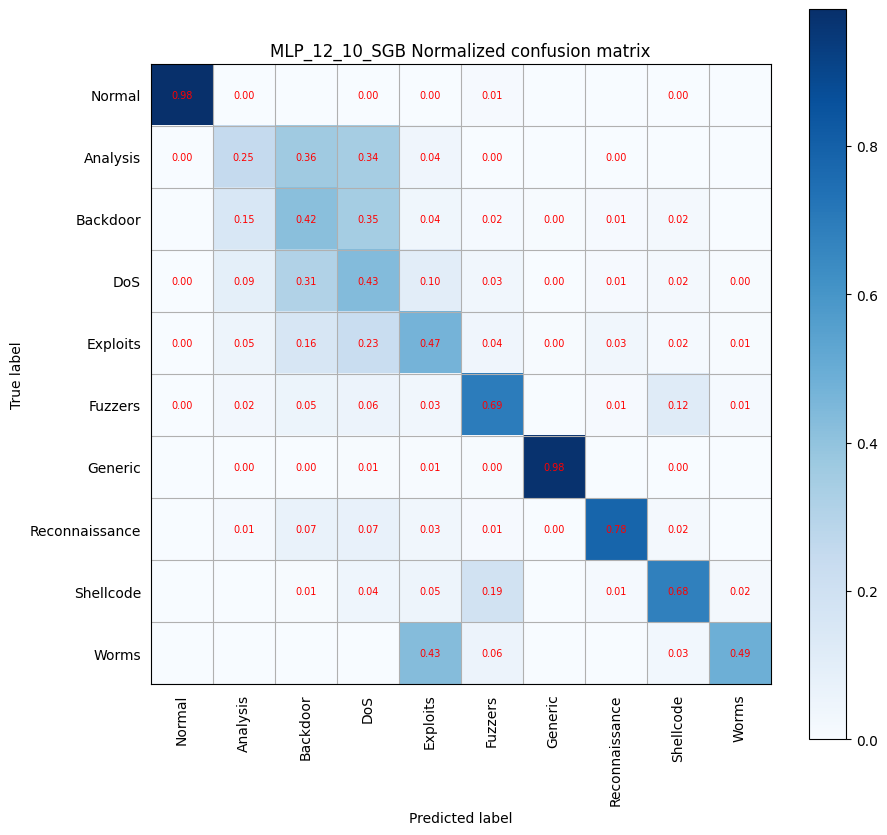

In [12]:
# -*-coding:utf-8-*-
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

labels = ['Normal','Analysis','Backdoor','DoS','Exploits','Fuzzers','Generic','Reconnaissance','Shellcode','Worms']

y_true = y_true_label
y_pred  = y_pred_label


tick_marks = np.array(range(len(labels))) + 0.5

def plot_confusion_matrix(cm, title='Confusion Matrix', cmap=plt.cm.binary):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    xlocations = np.array(range(len(labels)))
    plt.xticks(xlocations, labels, rotation=90)
    plt.yticks(xlocations, labels)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


cm = confusion_matrix(y_true, y_pred)
np.set_printoptions(precision=2)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(10, 10), dpi=100)

ind_array = np.arange(len(labels))
x, y = np.meshgrid(ind_array, ind_array)

for x_val, y_val in zip(x.flatten(), y.flatten()):
    c = cm_normalized[y_val][x_val]
    if c > 0.001:
        plt.text(x_val, y_val, "%0.2f" % (c,), color='red', fontsize=7, va='center', ha='center')
# offset the tick
plt.gca().set_xticks(tick_marks, minor=True)
plt.gca().set_yticks(tick_marks, minor=True)
plt.gca().xaxis.set_ticks_position('none')
plt.gca().yaxis.set_ticks_position('none')
plt.grid(True, which='minor', linestyle='-')
plt.gcf().subplots_adjust(bottom=0.15)

plot_confusion_matrix(cm_normalized, title='MLP_12_10_SGB Normalized confusion matrix')
#plt.savefig('/home/hll/IDS/alldata/cm/confusion_matrix.png', format='png')
plt.show()

In [13]:
print(cm)

[[436921    460    126    733    624   3888     21     69    828     85]
 [     1    132    194    184     21      2      0      1      0      0]
 [     0     71    194    162     17      7      2      5      8      0]
 [     6    291   1006   1409    336    104      9     26     69     13]
 [    11    443   1397   2039   4162    351     43    278    135     47]
 [    12    116    256    269    151   3369      1     43    560     72]
 [     5     47    142    294    279    167  42097     11     46      9]
 [     0     33    188    202     94     31      3   2185     61      0]
 [     0      0      2     13     15     57      0      4    206      6]
 [     0      0      0      0     15      2      0      0      1     17]]


## multi-class evaluation indicators

In [14]:
from sklearn import metrics
from sklearn.metrics import classification_report

target_names = ['Normal','Analysis','Backdoor','DoS','Exploits','Fuzzers','Generic','Reconnaissance','Shellcode','Worms']
print(classification_report(y_true,y_pred,target_names=target_names))

                precision    recall  f1-score   support

        Normal       1.00      0.98      0.99    443755
      Analysis       0.08      0.25      0.12       535
      Backdoor       0.06      0.42      0.10       466
           DoS       0.27      0.43      0.33      3269
      Exploits       0.73      0.47      0.57      8906
       Fuzzers       0.42      0.69      0.53      4849
       Generic       1.00      0.98      0.99     43097
Reconnaissance       0.83      0.78      0.81      2797
     Shellcode       0.11      0.68      0.19       303
         Worms       0.07      0.49      0.12        35

      accuracy                           0.97    508012
     macro avg       0.46      0.62      0.47    508012
  weighted avg       0.98      0.97      0.97    508012



In [15]:
acc = metrics.accuracy_score(y_true,y_pred)
f1 = metrics.f1_score(y_true, y_pred,average='weighted')
pre = metrics.precision_score(y_true, y_pred, labels=None, pos_label=1, average='weighted')  #DR
recall = metrics.recall_score(y_true, y_pred, labels=None, pos_label=1, average='weighted', sample_weight=None)


print("acc:",acc)
print("pre:",pre)
print("DR=recall:",recall)
print("f1:",f1)

acc: 0.9659063171736101
pre: 0.9814228913823093
DR=recall: 0.9659063171736101
f1: 0.9723508591653435


## binary-class evaluation indicators

In [ ]:
TP=cm[1,1]
FP=cm[0,1]
FN=cm[1,0]
TN=cm[0,0]

acc = (TP+TN)/(TP+TN+FP+FN)
print("acc:",acc)

DR = TP/(TP+FN)
print("DR:",DR)

FPR = FP/(FP+TN)  #FAR
print("FPR:",FPR)

recall =TP/(TP+FN)
print("recall：",recall)

precision = TP/(TP+FP)
print("precision:",precision)

f1 = (2*precision*recall)/(precision+recall)
print("f1:",f1)